In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'VVM10','TM', 'Week_day'])
    df = df.astype(float)

    return df
def rf_model():
    df = pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday','Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])


    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = RandomForestClassifier(max_depth= 6, min_samples_split=5, n_estimators= 400, min_samples_leaf= 4)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Optionally, plot feature importances (requires matplotlib)
    
    plt.show()

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate sensitivity and specificity
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Holiday', 'Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][4014:4056]
    df_final['Prediction']=y_pred[291:333]

    accuracy_f = accuracy_score(y_test[291:333], y_pred[291:333])
    print("Accuracy final:", accuracy_f)

    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_finalsitu4.csv', index=False)
    return df_final

def main():
    rf_model()

C:\Users\julsd\AppData\Local\Temp\ipykernel_21948\3972799047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'] = df['Holiday'].map(mapeo)


Accuracy: 0.8143074581430746
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.73      0.80       326
         1.0       0.77      0.89      0.83       331

    accuracy                           0.81       657
   macro avg       0.82      0.81      0.81       657
weighted avg       0.82      0.81      0.81       657

Confusion Matrix:
[[239  87]
 [ 35 296]]


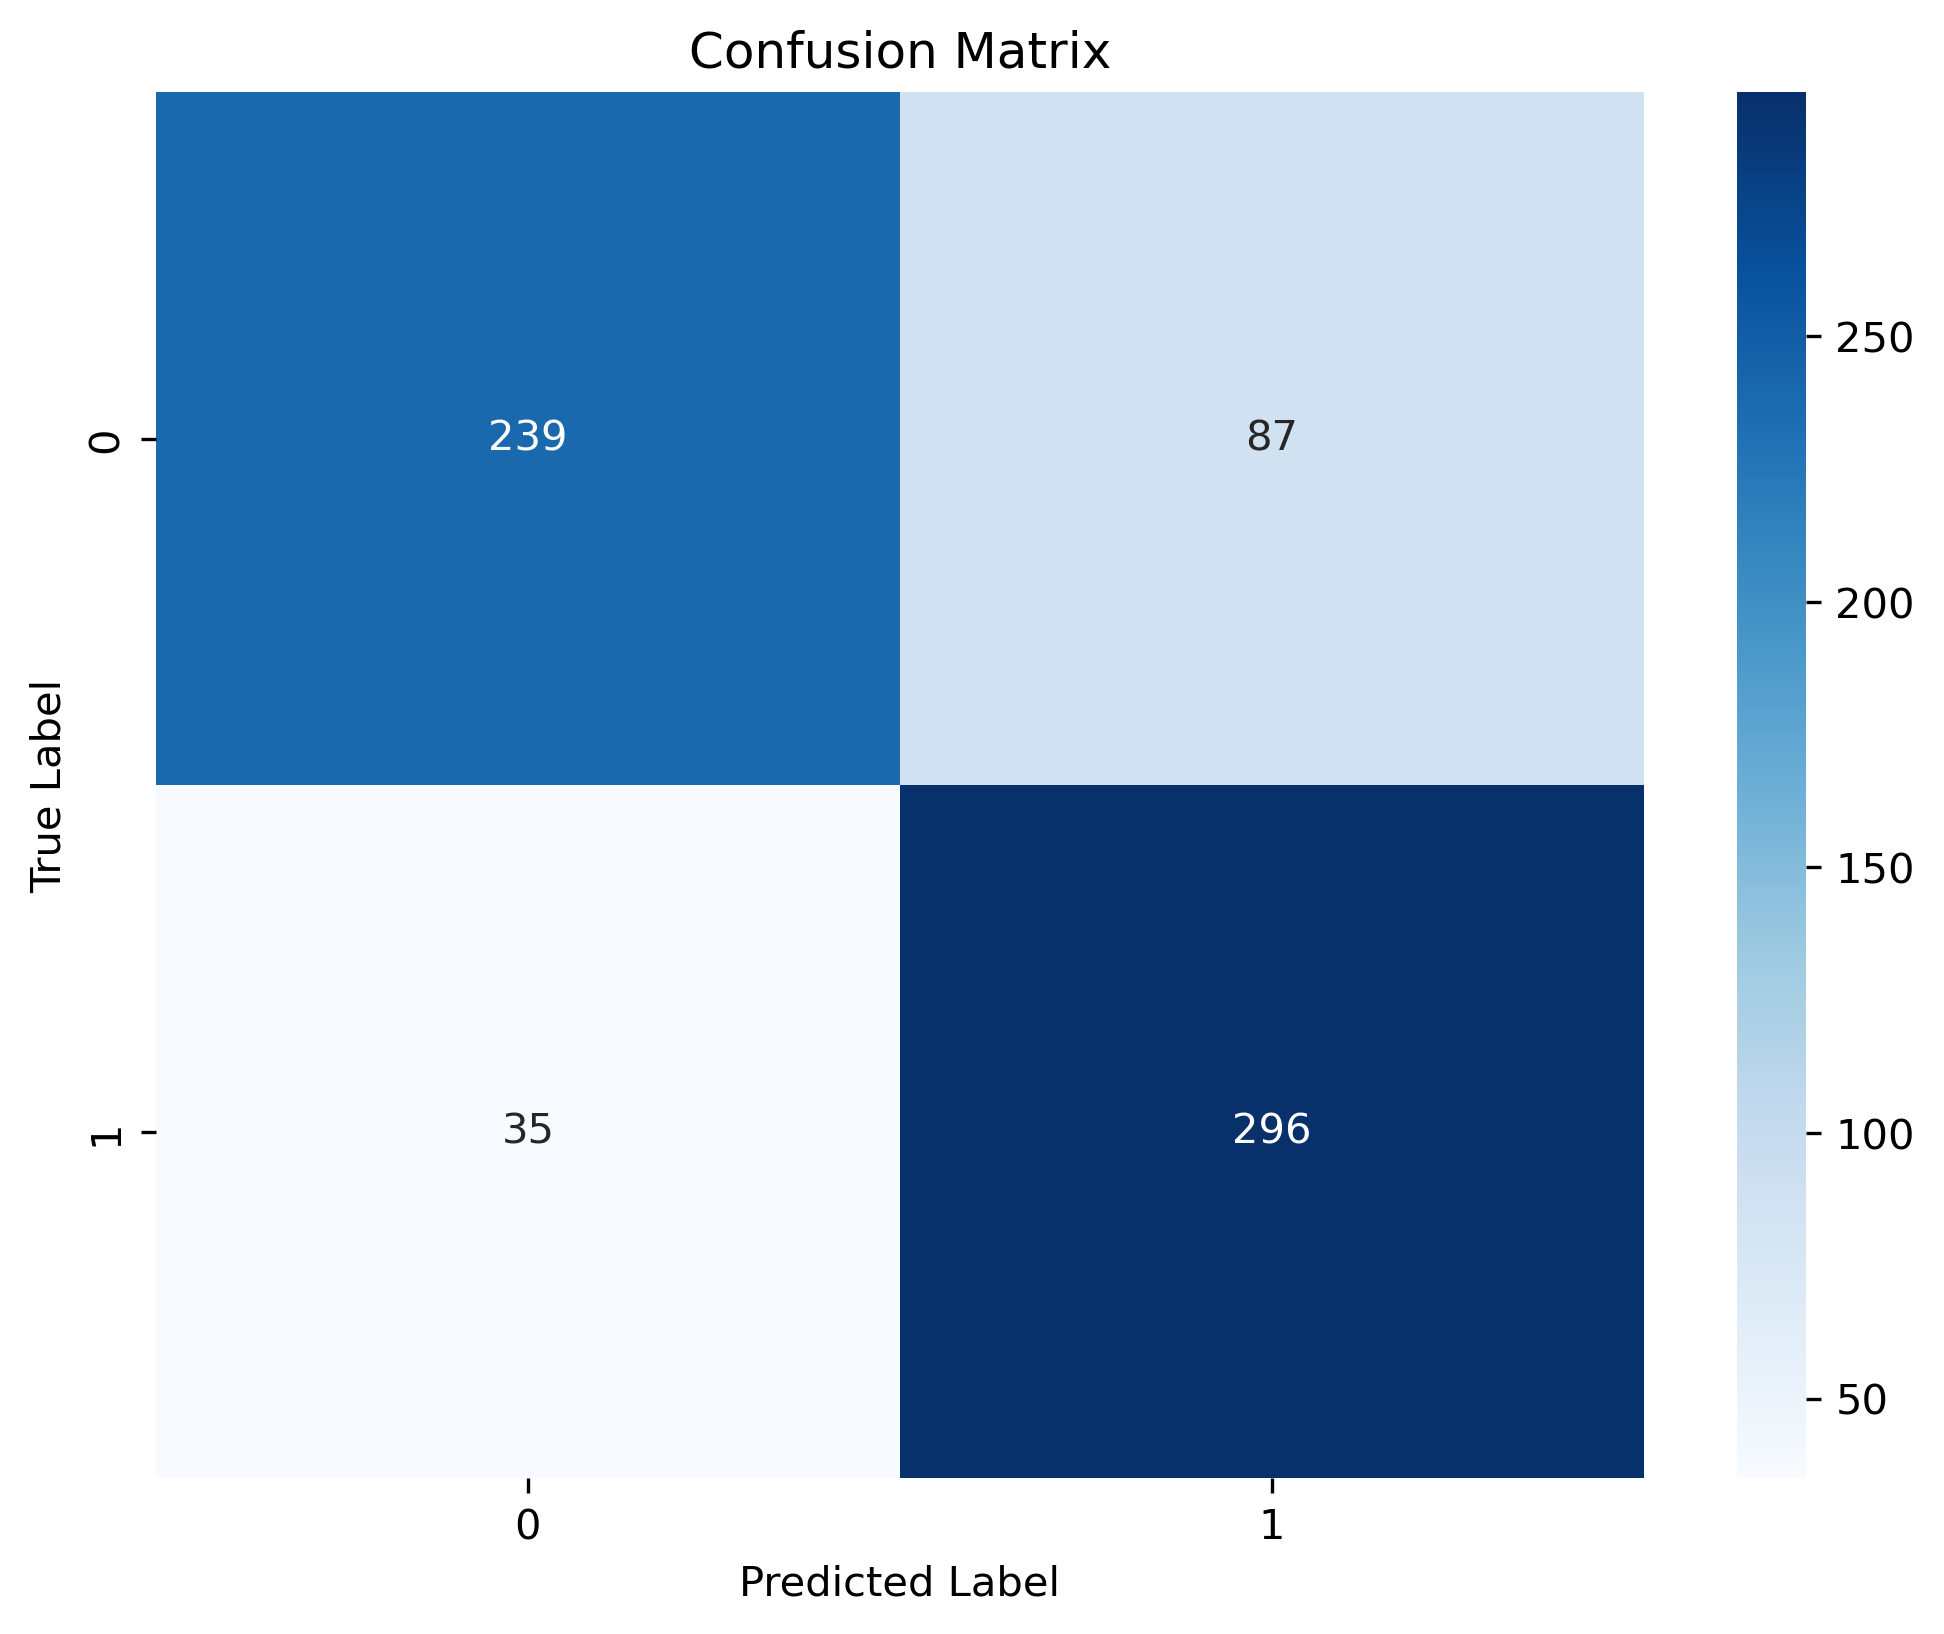

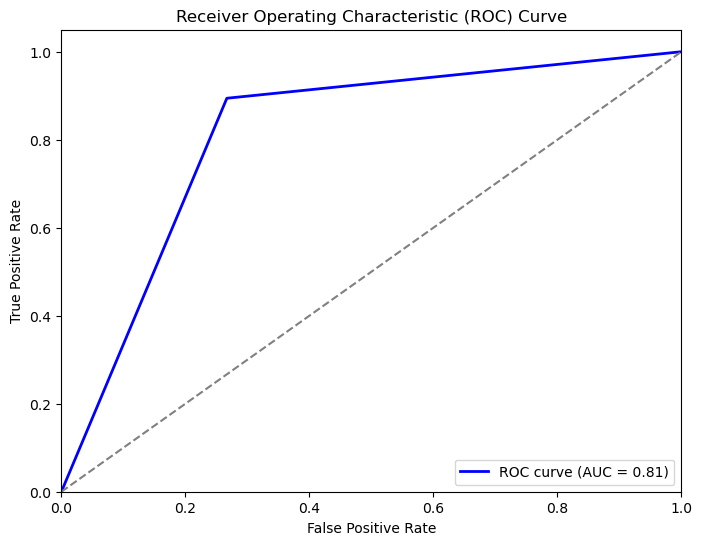

Sensitivity: 0.8942598187311178
Specificity: 0.7331288343558282
Accuracy final: 0.8571428571428571
       Day Holiday Time_Segment  VVM10 Season     TM  Week_day  Vacation_week  Exceeds Threshold  Prediction
2022-11-01      No          2-6 Medium Autumn Medium   Tuesday              1                  0         0.0
2022-11-01      No         6-10 Medium Autumn Medium   Tuesday              1                  0         1.0
2022-11-01      No        10-14 Medium Autumn Medium   Tuesday              1                  1         1.0
2022-11-01      No        14-18 Medium Autumn Medium   Tuesday              1                  0         1.0
2022-11-01      No        18-22 Medium Autumn Medium   Tuesday              1                  0         1.0
2022-11-01      No         22-2 Medium Autumn Medium   Tuesday              1                  0         0.0
2022-11-02      No          2-6 Medium Autumn Medium Wednesday              1                  0         0.0
2022-11-02      No         6-

In [19]:
main()

In [20]:
df=pd.read_csv('tabla_finalsitu4.csv')

In [21]:
df

,Day,Holiday,Time_Segment,VVM10,Season,TM,Week_day,Vacation_week,Exceeds Threshold,Prediction
0,2022-11-01,No,2-6,Medium,Autumn,Medium,Tuesday,1,0,0.0
1,2022-11-01,No,6-10,Medium,Autumn,Medium,Tuesday,1,0,1.0
2,2022-11-01,No,10-14,Medium,Autumn,Medium,Tuesday,1,1,1.0
3,2022-11-01,No,14-18,Medium,Autumn,Medium,Tuesday,1,0,1.0
4,2022-11-01,No,18-22,Medium,Autumn,Medium,Tuesday,1,0,1.0
5,2022-11-01,No,22-2,Medium,Autumn,Medium,Tuesday,1,0,0.0
6,2022-11-02,No,2-6,Medium,Autumn,Medium,Wednesday,1,0,0.0
7,2022-11-02,No,6-10,Medium,Autumn,Medium,Wednesday,1,0,1.0
8,2022-11-02,No,10-14,Medium,Autumn,Medium,Wednesday,1,1,1.0
9,2022-11-02,No,14-18,Medium,Autumn,Medium,Wednesday,1,1,1.0
